<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Привет, Вячеслав!</b>

Меня зовут Алексей Косенко, и я буду проверять твой проект.
    
Предлагаю общаться на «<b>ты</b>», но если это неудобно — обязательно сообщи об этом.
    
Ниже ты увидишь мои комментарии, выделенные разным цветом:
    
<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Отлично!</b> ✔️: все ок, продолжай в том же духе :)

</div>
<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
<b>Есть совет</b> ⚠️: так выделены некритичные замечания или советы, которые смогут улучшить твой проект.

</div>
<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Нужно доработать</b> ❌: так выделены важные замечания — без их исправления проект не может быть принят.
    
</div>

Будет здорово, если ты будешь участвовать в диалоге, а свои вопросы, комментарии и изменения в проекте тоже будешь выделять, например, вот так:
    
<div class="alert alert-info">
    <b>Комментарий студента:</b> твой комментарий
</div>
    
Пожалуйста, не перемещай и не удаляй мои комментарии, это усложнит повторную проверку.
    
</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Привет, конечно я не против на ты) Спасибо за комментарии. Я исправил там, где смог. но остались вопросы по 3му разделу, который я не смог сделать.Проект выполнял в дикой спешке, так как из-за экзаменов пропустил два спринта и приходится нагонять, так что прошу прощения за кривость(
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Еще раз привет!</b>

Спасибо, что доделал работу, оформление комментариев остается тем же, только обозначим номер итерации: v2
    
Не страшно, давай посмотрим, что получилось :)
    
</div>

<div class="alert alert-info">
    <b>Комментарий студента V2:</b> Привет) В общем, посидел, допилил, но не могу сказать, что всё идеально. Пару моментов, которые ты рекомендовал, сломались, и я пошёл по пути наименьшего сопротивления, чтобы всё запускалось. Добавил сложного кода, поправлял косяки. Старался сосредоточиться, но дедлайн до 11 не давал покоя) но должно быть лучше, чем первая версия. Буду рад твоей помощи)
</div>

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>И снова здравствуй!</b>

Супер, давай посмотрим, как прогресс, номер итерации: v3
    
</div>

# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

### Шаг 1. Откройте файлы с данными

Итак, перед нами стоит задача - научиться предсказывать, откажется ли клиент от брони, чтобы нужному клиенту преложить внести депозит, дабы компания не пострадала от убытков. Причём сумма депозита должна покрыть минимум одну уборку и одну ночь в отеле. С учетом высего вышесказанного, задачу можно поделить на пункты:

- Предобработка и исследовательский анализ данных
- Постановка задачаи и обучение модели для машинного обучения
- Выбор лучшей модели для ML
- Анализ метрик, подсчёт результатов

В итоге у нас должен получится "портрет" клиента, который закажет бронь, но откажется от неё в будущем.

In [1]:
pip install pandas_profiling

     |████████████████████████████████| 324 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 344 kB 63.0 MB/s eta 0:00:01
     |████████████████████████████████| 679 kB 81.9 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 80.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 80.2 MB/s eta 0:00:010:01
     |████████████████████████████████| 2.0 MB 58.1 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 79.9 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 54.2 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=1e4e792192783e4bd697c82052115e734c49727d9b9f7a2778be6c1ba2bbaa20
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install category_encoders

     |████████████████████████████████| 81 kB 2.4 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance

/tmp/ipykernel_48/3980283479.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [4]:
htrain = pd.read_csv('/datasets/hotel_train.csv')
htest = pd.read_csv('/datasets/hotel_test.csv')

In [5]:
hotels = [htrain, htest]

In [6]:
display(htrain.head())

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3


In [7]:
display(htest.head())

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7


In [8]:
htrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [9]:
htest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

In [10]:
htrain.describe(include = "all")

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
count,65229.000000,65229.000000,65229.000000,65229.000000,65229,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,...,65229.000000,65229.000000,65229.000000,65229,65229.000000,65229.000000,65229,65229.000000,65229.000000,65229.000000
unique,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7,NaN,NaN,4,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,October,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,A,NaN,NaN,Transient,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,9255,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,50501,NaN,NaN,45493,NaN,NaN,NaN
mean,43544.069172,0.368609,96.337917,2015.719021,NaN,31.339772,15.847813,0.825185,2.224793,1.836576,...,0.027151,0.128915,0.107713,NaN,0.194269,3.334422,NaN,0.056647,0.512763,3.049978
std,25614.858971,0.482431,96.127545,0.449481,NaN,13.464024,8.748182,0.853477,1.354992,0.480245,...,0.162523,0.965326,1.326638,NaN,0.593838,18.239606,NaN,0.232094,0.752590,1.738108
min,0.000000,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,1.000000
25%,19108.000000,0.000000,17.000000,2015.000000,NaN,21.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,2.000000
50%,40554.000000,0.000000,64.000000,2016.000000,NaN,34.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,3.000000
75%,67414.000000,1.000000,151.000000,2016.000000,NaN,42.000000,23.000000,2.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,1.000000,4.000000


In [11]:
htest.describe(include = "all")

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
count,32412.000000,32412.000000,32412.000000,32412.0,32412,32412.000000,32412.000000,32412.000000,32412.00000,32412.000000,...,32412.000000,32412.000000,32412.000000,32412,32412.000000,32412.000000,32412,32412.000000,32412.000000,32412.000000
unique,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7,NaN,NaN,4,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,A,NaN,NaN,Transient,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,5262,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,23471,NaN,NaN,27461,NaN,NaN,NaN
mean,60131.505183,0.388467,97.587869,2017.0,NaN,17.804054,15.656948,0.867888,2.34009,1.858602,...,0.031377,0.011601,0.171418,NaN,0.216741,0.262341,NaN,0.046248,0.657781,3.207979
std,29953.586177,0.487409,86.507146,0.0,NaN,9.177384,8.766429,0.853394,1.37517,0.489341,...,0.174338,0.180473,1.875170,NaN,0.640551,4.733027,NaN,0.219367,0.834341,1.738683
min,6086.000000,0.000000,0.000000,2017.0,NaN,1.000000,1.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,1.000000
25%,45291.750000,0.000000,23.000000,2017.0,NaN,10.000000,8.000000,0.000000,1.00000,2.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,2.000000
50%,53394.500000,0.000000,76.000000,2017.0,NaN,18.000000,15.500000,1.000000,2.00000,2.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,3.000000
75%,89800.250000,1.000000,155.000000,2017.0,NaN,25.000000,23.000000,2.000000,3.00000,2.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,1.000000,4.000000


Данные открыты, можно приступать к обработке.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: данные на месте!</div>

### Шаг 2. Предобработка и исследовательский анализ данных

На этом этапе посмотрим на пропущенные значения, проверим дупликаты и посомтрим на корреляции, может найдём закономерности.

#### Предобработка

In [12]:
for h in hotels:
    print(h.isna().sum(), end='\n\n')

id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
dtype: int64

id                                0
is_canceled                       0
lead_time     

In [13]:
for h in hotels:
    duplicateRows = h[h.duplicated()]
    display(duplicateRows)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights


<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: еще стоит проверить наличие полных дубликатов после удаления id</div>

In [14]:
for hot in hotels:
    hot.drop('id', axis=1, inplace=True) # уберём ненужный столбец

In [15]:
for h in hotels:
    duplicateRows = h[h.duplicated()]
    display(duplicateRows)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
13,0,72.0,2015,July,27,1,2,4,2.0,0.0,...,0,0,0,A,1,0,Transient,0,1,6
85,1,5.0,2015,July,28,5,1,0,2.0,0.0,...,0,0,0,D,0,0,Transient,0,0,1
115,0,0.0,2015,July,28,7,0,1,1.0,0.0,...,0,0,0,A,0,0,Transient,0,3,1
127,1,1.0,2015,July,28,8,0,1,2.0,0.0,...,0,0,0,A,0,0,Transient,0,1,1
219,0,40.0,2015,July,29,13,1,4,2.0,0.0,...,0,0,0,D,0,0,Transient,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65188,0,269.0,2016,December,53,29,2,3,1.0,0.0,...,0,0,0,A,0,0,Transient-Party,0,0,5
65189,0,269.0,2016,December,53,29,2,3,1.0,0.0,...,0,0,0,A,0,0,Transient-Party,0,0,5
65192,0,269.0,2016,December,53,29,2,3,1.0,0.0,...,0,0,0,A,0,0,Transient-Party,0,0,5
65193,0,269.0,2016,December,53,29,2,3,1.0,0.0,...,0,0,0,A,0,0,Transient-Party,0,1,5


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
2,1,62.0,2017,January,1,1,2,2,2.0,0.0,...,0,0,0,A,0,0,Transient,0,1,4
34,1,113.0,2017,January,2,8,1,0,2.0,0.0,...,0,0,0,A,0,0,Transient,0,0,1
59,1,40.0,2017,January,3,16,1,2,1.0,0.0,...,0,0,0,A,0,0,Transient-Party,0,0,3
61,1,40.0,2017,January,3,16,1,2,1.0,0.0,...,0,0,0,A,0,0,Transient-Party,0,0,3
63,1,40.0,2017,January,3,16,1,2,1.0,0.0,...,0,0,0,A,0,0,Transient-Party,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32377,0,186.0,2017,August,35,31,0,3,2.0,0.0,...,0,0,0,D,0,0,Transient,0,2,3
32380,0,63.0,2017,August,35,31,0,3,3.0,0.0,...,0,0,0,D,0,0,Transient-Party,0,2,3
32381,0,63.0,2017,August,35,31,0,3,3.0,0.0,...,0,0,0,D,0,0,Transient-Party,0,2,3
32382,0,63.0,2017,August,35,31,0,3,3.0,0.0,...,0,0,0,D,0,0,Transient-Party,0,2,3


<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: в реальных проектах, конечно, нужно было бы поизучать подробнее природу этих дубликатов и проконсультироваться с коллегами по их поводу, но так как такой возможности у нас нет, то придется разбираться самим. Сам факт наличия уникального ID не подтверждает уникальность реального бронирования :) Во-первых, мы не знаем, все ли признаки, которые есть в бронировании, до нас дошли в виде csv файла. Во-вторых, это может быть просто технической ошибкой при записи или выгрузке. В-третьих, не стоит забывать про человеческий фактор: например, сами клиенты могли случайно забронировать номер дважды. А вообще в данных довольно много признаков, позволяющих довольно точно идентифицировать бронирование(день приезда, гражданство и тип заказчика, количество забронированных ночей, дата бронирования(lead time), дополнительные параметры заказа и т.д.), поэтому это больше похоже на техническую ошибку, и я бы в этом случае их удалял, чтобы избежать переобучения(особенно при использовании кросс-валидации), так итоговая оценка будет честнее, даже несмотря на то, что мы теряем ощутимую часть данных. Но в общем случае обязательно нужно разбираться подробнее</div>

<div class="alert alert-info">
    <b>Комментарий студента V2:</b> Немного здесь непонятно. Явных дупликатов я здесь не обнаружил. Но допустим, клиенты могут забронировать номера одного и того же типа, на одно и то же кол-во ночей. Стоит ли считать это дупликатом?
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: тоже не совсем понятно, все записи в таблицах выше и есть дубликаты :) Можешь пояснить, что ты имеешь в виду под явными дубликатами? А как я писал выше, с учетом количества параметров, которые могут довольно точно идентифицировать бронирование, такое количество дубликатов больше похоже на техническую ошибку</div>

In [16]:
for hot in hotels:
    hot.drop('customer_type', axis=1, inplace=True)

#### Исследовательский анализ

In [ ]:
pandas_profiling.ProfileReport(htrain)

Как мы можем видеть из отдела "Корреляция" в отчете по датасету, целевой признак имеет некую корреляцию с стобцом lead_time (назовём его оттягиванием). Попробуем исследовать эту связь

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: круто, что используешь профайлер, очень упрощает работу!</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> прошлый ревьювер научил)
</div>

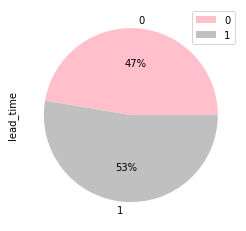

In [18]:
colors = ['pink', 'silver', 'steelblue']
htrain.groupby(['is_canceled']).sum().plot(
    kind='pie', y='lead_time',
  autopct='%1.0f%%', colors=colors)
plt.show()

In [19]:
(htrain
 .pivot_table(index='is_canceled', 
              values='lead_time', 
              aggfunc=['mean', 'count'])
 .reset_index())

,is_canceled,mean,count
,,lead_time,lead_time
0,0,72.236615,41185
1,1,137.621070,24044


Картина такая: в среднем люди. отменяющие бронь ждали очень много - 137 дней. Есть предположение, что это аномалия. Проверим

In [20]:
htrain[htrain['lead_time'] > 125]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
131,1,280.0,2015,July,28,8,2,5,2.0,1.0,...,TA/TO,0,0,0,D,0,0,0,1,7
146,0,249.0,2015,July,28,9,2,5,2.0,0.0,...,TA/TO,0,0,0,A,0,0,0,1,7
161,0,304.0,2015,July,28,11,2,4,2.0,0.0,...,TA/TO,0,0,0,A,1,0,0,1,6
215,1,321.0,2015,July,29,13,1,4,2.0,0.0,...,TA/TO,0,0,0,A,0,0,0,1,5
428,1,299.0,2015,July,30,25,2,5,2.0,1.0,...,TA/TO,0,0,0,A,0,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65213,0,171.0,2016,December,53,31,2,2,2.0,0.0,...,TA/TO,0,0,0,A,0,0,0,1,4
65214,0,258.0,2016,December,53,28,2,5,1.0,1.0,...,TA/TO,0,0,0,B,2,0,0,3,7
65215,0,259.0,2016,December,53,28,2,5,2.0,1.0,...,TA/TO,0,0,0,B,3,0,0,3,7
65216,0,259.0,2016,December,53,28,2,5,2.0,1.0,...,TA/TO,0,0,0,A,3,0,0,3,7


Это не аномалия, таких значений много, но очень странно, что люди ждут почти год, чтобы отменить бронь. Я допускаю, что они могли просто забыть, и потом, получив уведомление от компании, постфактум отменить. <br> Даже если учесть тот факт, что человек бронирует заранее, допустим, январь месяц, а он бронирует на лето - есть люди, тянущие больше года. 

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: вероятнее всего, чаще бронь отменяется со стороны отеля в день заселения, если постоялец не приехал, из-за чего отель и несет убытки</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Вероятно, но что мы тогда сделаем с большими lead_time? Если отель сам отменяет бронь, то тогда он бы делал это вовремя
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: при таком сценарии сам отель может узнать об этом уже только по факту и отменить только в день заезда или накануне, если клиент не заселился. Поэтому, нам предлагается разработать систему депозитов, которая поможет решить эту проблему. А вообще, бронирования номеров за год вполне могут быть объяснимы: гости часто планируют отпуск заранее и бронируют отель в том числе во время акционных предложений, поэтому можно оставить либо как есть, либо выбрать порог для отсечения самых нерепрезентативных значений</div>

<div class="alert alert-info">
    <b>Комментарий студента V2:</b> Я, собственно и оставил, потому что случаи бывают разные, поэтому здесь ничгео не трогал
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

In [21]:
htrain[htrain['lead_time'] > 365]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
4893,0,373.0,2016,September,37,4,4,6,2.0,0.0,...,TA/TO,0,0,0,D,0,0,0,0,10
30405,1,372.0,2016,July,29,14,0,1,1.0,0.0,...,TA/TO,0,0,0,A,0,0,0,0,1
30407,1,372.0,2016,July,29,14,0,1,1.0,0.0,...,TA/TO,0,0,0,A,0,0,0,0,1
30408,1,372.0,2016,July,29,14,0,2,2.0,0.0,...,TA/TO,0,0,0,A,0,0,0,0,2
30409,1,372.0,2016,July,29,14,0,2,2.0,0.0,...,TA/TO,0,0,0,A,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37841,1,374.0,2015,October,44,26,1,1,2.0,0.0,...,TA/TO,0,1,0,A,0,0,0,0,2
37842,1,374.0,2015,October,44,26,1,1,2.0,0.0,...,TA/TO,0,1,0,A,0,0,0,0,2
37843,1,374.0,2015,October,44,26,1,1,2.0,0.0,...,TA/TO,0,1,0,A,0,0,0,0,2
37844,1,374.0,2015,October,44,26,1,1,2.0,0.0,...,TA/TO,0,1,0,A,0,0,0,0,2


Предлагаю посомтреть, из какой страны данные граждане

In [22]:
htrain[(htrain['lead_time'] > 365) & (htrain['is_canceled'] == 1)].pivot_table(index='country', values='lead_time', aggfunc='mean')

,lead_time
country,
FRA,372.000000
PRT,371.166667


In [23]:
htrain[(htrain['is_canceled'] == 1) & (htrain['lead_time'] != 0.0)]['lead_time'].value_counts()

34.0     249
1.0      222
68.0     222
37.0     222
277.0    214
        ... 
331.0      2
319.0      2
347.0      2
348.0      2
345.0      1
Name: lead_time, Length: 362, dtype: int64

In [24]:
htrain[(htrain['is_canceled'] == 1)]['country'].value_counts()

PRT    16604
ESP     1081
GBR      938
FRA      876
ITA      767
       ...  
IMN        1
ECU        1
SEN        1
HND        1
UZB        1
Name: country, Length: 112, dtype: int64

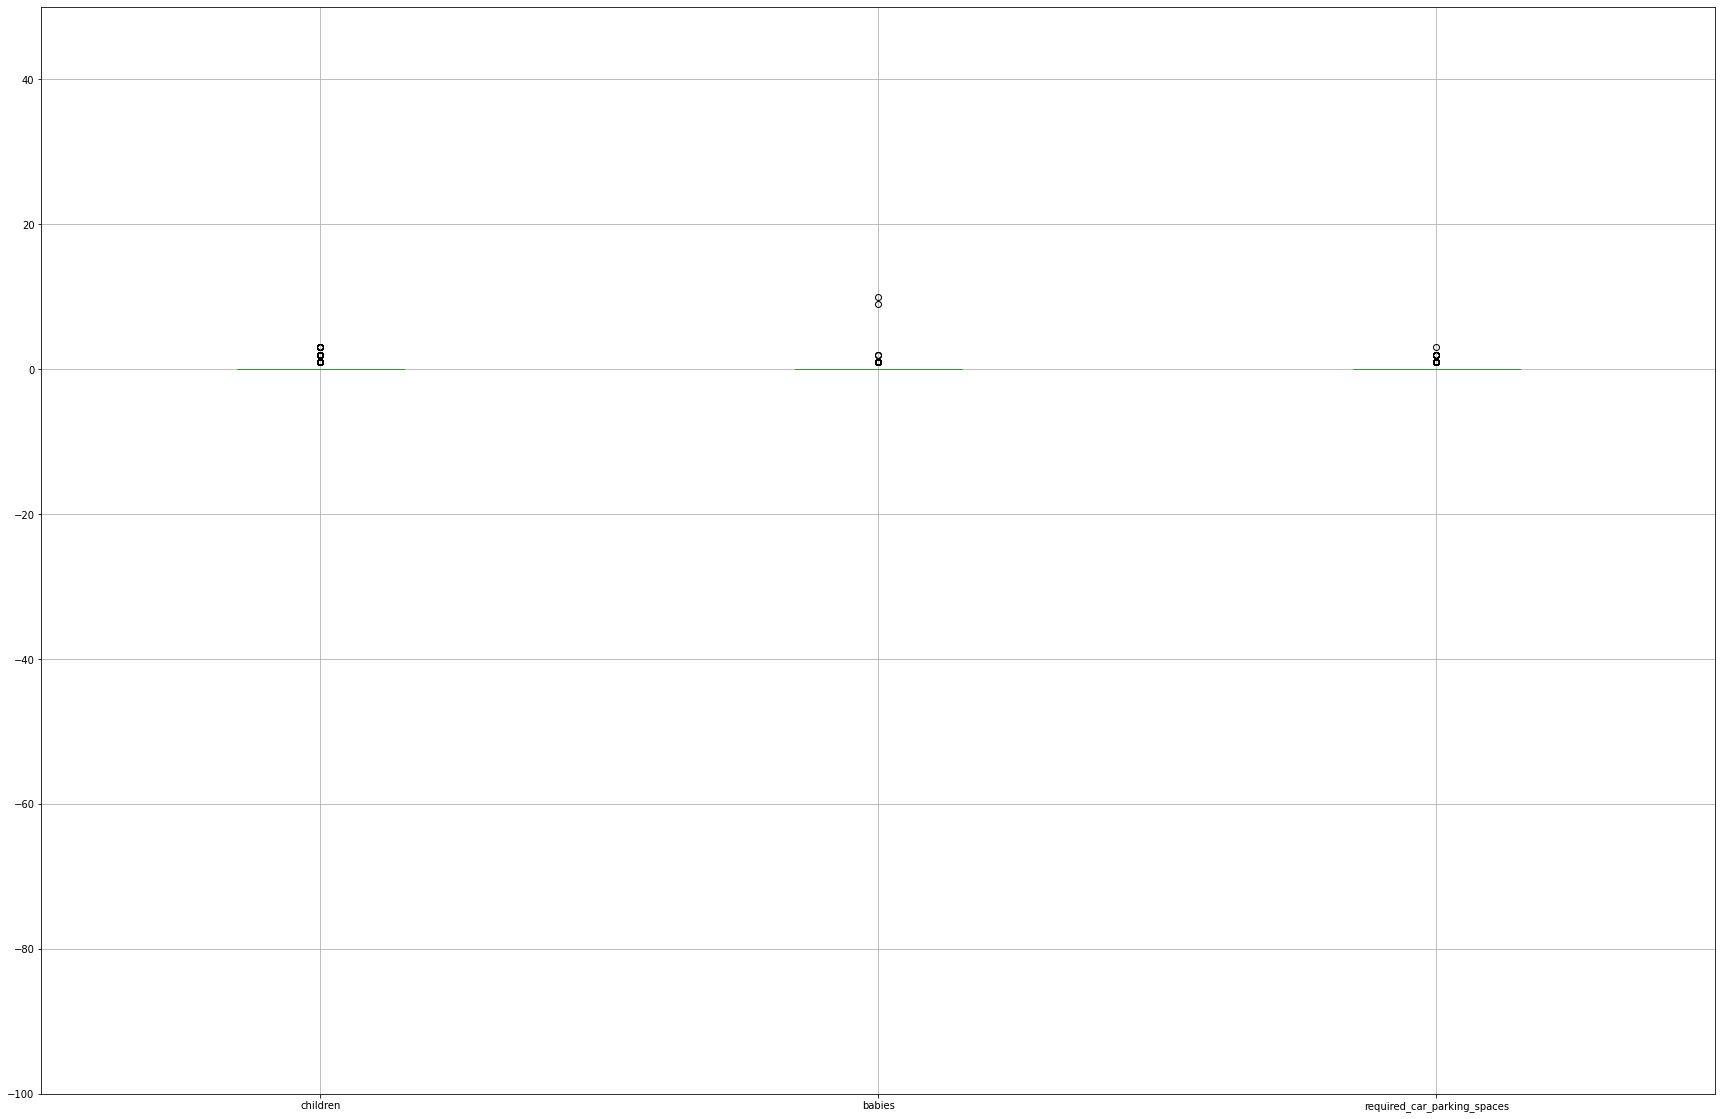

In [25]:
htrain.boxplot(column=['children', 'babies', 'required_car_parking_spaces'], figsize=(30, 20))
plt.ylim(-100, 50);

In [26]:
row = htrain[(htrain['babies'] > 5) | (htrain['required_car_parking_spaces'] > 2)].index
htrain = htrain.drop(index=row)

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: окей, но если внимательно изучить признак, то можно заметить, что бронирований с 2 младенцами тоже слишком мало, чтобы использовать их для прогноза, такие записи тоже лучше обработать. Тогда признак можно переименовать, например, в `has_babies`, чтобы обозначить его теперь уже бинарную природу</div>

<div class="alert alert-info">
    <b>Комментарий студента V2:</b> Тут хотелось бы поспорить. Вероятность есть, что семьи с 1-2 детьми не отказываются от брони, а дальше - отказываются, и если мы превратим это в столблец с бинарным распределением классов, то модель запутается.
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: вполне может быть, что какая-либо зависимость между количеством детей и фактом отмены есть, но судить о ней мы по 3 строкам не можем :)</div>

In [40]:
# код ревьюера

htrain['babies'].value_counts()

0.0    64613
1.0      444
2.0        3
Name: babies, dtype: int64

In [27]:
row = htrain[(htrain['adults'] == 0)].index
htrain = htrain.drop(index=row)

In [28]:
row = htrain[(htrain['total_nights'] == 0)].index
htrain = htrain.drop(index=row)

In [29]:
for i in htrain[['total_nights', 'stays_in_week_nights', 'stays_in_weekend_nights']].index:
    if htrain['total_nights'][i] != htrain['stays_in_week_nights'][i] + htrain['stays_in_weekend_nights'][i]:
        print('Unnamed')

In [30]:
htrain = htrain.drop(['stays_in_week_nights', 'stays_in_weekend_nights'], axis=1)

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: окей, но здесь для уверенности можно проверить, выполняется ли это условие для всех бронирований</div>

<div class="alert alert-info">
    <b>Комментарий студента V2:</b> Проверил, всё чисто)
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

Уберем аномальные значения, такие как семьи с большим количеством детей, клиентов, отмечающих более одного парковочного места, ячейки без взрослых клиентов и клиентов, бронирующих номер на 0 ночей.

In [31]:
for col in htrain.columns:
    if htrain[col].dtypes == 'object':
        print(htrain[col].unique())        

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
['BB       ' 'FB       ' 'HB       ' 'SC       ' 'SC']
['GBR' 'PRT' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'USA' 'DEU' 'BEL' 'CHE' 'CN'
 'GRC' 'NLD' 'ARG' 'RUS' 'SWE' 'POL' 'EST' 'CZE' 'ITA' 'FIN' 'DNK' 'MOZ'
 'BWA' 'LUX' 'BRA' 'SVN' 'ALB' 'CHN' 'MEX' 'MAR' 'SMR' 'LVA' 'CHL' 'AUT'
 'LTU' 'TUR' 'ISR' 'IND' 'CYM' 'AUS' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN'
 'TUN' 'ARE' 'HRV' 'HKG' 'IRN' 'GIB' 'JEY' 'URY' 'ZAF' 'COL' 'GGY' 'KWT'
 'CYP' 'KAZ' 'THA' 'DOM' 'NGA' 'BLR' 'VEN' 'UKR' 'ARM' 'JPN' 'LKA' 'MYS'
 'BIH' 'MUS' 'OMN' 'SUR' 'JAM' 'BGR' 'CIV' 'SRB' 'JOR' 'SYR' 'PHL' 'PRI'
 'SGP' 'BDI' 'LBN' 'AGO' 'VNM' 'AZE' 'PLW' 'NZL' 'EGY' 'MDV' 'CMR' 'MLT'
 'SVK' 'MWI' 'STP' 'TWN' 'IDN' 'SEN' 'PER' 'SAU' 'KNA' 'ETH' 'ECU' 'IRQ'
 'AND' 'HND' 'PAK' 'GEO' 'ZMB' 'QAT' 'KHM' 'MCO' 'BGD' 'ISL' 'UZB' 'IMN'
 'TJK' 'NIC' 'BEN' 'MAC' 'VGB' 'TZA' 'GAB' 'MKD' 'TMP' 'GLP' 'KEN' 'LIE'
 'MMR' 'PAN' 'BFA' 'LBY' 'GNB'

In [32]:
for i in htrain['reserved_room_type'].index:
    htrain['reserved_room_type'][i] = htrain['reserved_room_type'][i].rstrip()

/tmp/ipykernel_48/695320375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  htrain['reserved_room_type'][i] = htrain['reserved_room_type'][i].rstrip()


In [33]:
for i in htrain['meal'].index:
    htrain['meal'][i] = htrain['meal'][i].rstrip()

/tmp/ipykernel_48/2332695448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  htrain['meal'][i] = htrain['meal'][i].rstrip()


In [34]:
(htrain['reserved_room_type'].unique())  

array(['A', 'C', 'D', 'E', 'G', 'F', 'B'], dtype=object)

In [35]:
htrain['meal'].unique() 

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

Также уберём пробелы в названиях. Неявных дупликатов, к счастью, не обнаружилось

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: окей, но здесь явно можно больше времени уделить предобработке, начать можно со следующего:
1. Лучше внимательнее изучить каждый признак на предмет выбросов: например, 10 младенцев в бронировании или 8 требуемых парковочных мест — явные аномалии, которые стоит обработать;
2. Стоит проверить категориальные признаки на предмет лишних пробелов и неявных дубликатов
3. Также можно проверить данные на адекватность: например, детям без взрослых номер сдать не могут, так что если такие записи есть — их лучше удалить
4. Судя по описанию, `total_nights` — это сумма `stays_in_week_nights` и `stays_in_weekend_nights`, лучше это проверить, и если это и правда так, то все три признака нам не нужны, некоторые стоит удалить</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Сделал, но вопросы есть. Например, 8 детей - могут же приехать такие семьи. Насчёт 4го пункта - так оно и есть, поэтому я оставил total_nights, остальные удалил. И ещё - надо ли делать то же самое в тестовой выборке, всё-таки, модель должна уметь работать и с такими данными? Или я ошибаюсь?
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: даже при условии, что бронирования с 8 и более детьми — реальны, таких записей слишком мало, чтобы использовать их для обучения. При обработке тестовой выборки также важно избавиться от лишних пробелов и признаков. А при обработке выбросов вообще обычно еще стоит ориентироваться на их природу. Например, когда выбросы вполне легко объясняются предметной областью, можно как раз вернуться к lead_time: люди бронируют номер за год и более. Несмотря на то, что это статистические выбросы, это тоже объясняет поведение определенной группы пользователей, а значит может быть полезно и для модели. Если же выбросы единичны(как в случае с младенцами) или противоречат здравому смыслу(детям до 14 лет без взрослых не могут сдать номер по закону), то полезными для модели эти данные вряд ли назовешь, скорее, они будут вносить лишний шум. Но проконсультироваться с коллегами по этому поводу и выяснить причину выбросов, конечно, стоит :)</div>

<div class="alert alert-info">
    <b>Комментарий студента V2:</b> Учитывая частоту таких значений, я не уверен, что это выбросы (по поводу lead_time). А в остальном - убедил, вычеркнул эти значения)
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

Итак, мы хотим убрать убытки или, хотя бы, сократить их. Для этого нам нужно предугадать, откажется ли клиент от брони. Для этогь нам нужно обучить модель. Бинарный столбец "is_canceled" - наш целевой показатель.
<br> Нам нужно угадать, 0 или 1 будет в свежих данных.Мы выяснили, что есть корреляция с оттягиванием, то есть, он будет влиять на предсказание модели, которую мы выберем.

Так как целевой признак у нас бинарный - мы имеем дело с задачей классификации и модели будем использовать соответствующие.

Но для начала нам нужно вычислить прибыль отеля без депозитов. Вычислим минимум, допустим, что все гости оставлись на одну ночь, и в номерах у них провели одну уборку. Так как данные из тренировочной и тестовой выборок взяты не из потолка, и в этом разделе не надо обучать модели, то для более точных результатов объединим выборки в одну.

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: не совсем, на этом этапе необходимо рассчитать общую и реальную прибыль за тестовый период(на тестовой выборке) до внедрения модели, с учетом всех правил, указанных в задании. После выбора лучшей модели нужно аналогично рассчитать общую прибыль после внедрения. Если разница будет больше расходов на разработку(400000), тогда модель будет полезна бизнесу</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> С этим разделом возникли большие проблемы, потому что я застрал на вычислении прибыли. Вот я указал для каждого типа комнаты стоимость с учетом уборки на ночь, умножил на проценты, в зависимости от сезона, а как дальше? Как, например посчитать, сколько приемов пищи заказал бы клиент, и на сколько ночей он забронировал. Это все вычисляется в цикле? или как-то по -другому? Помоги пожалуйста разобраться с этим.
</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: давай попробуем разобраться чуть подробнее:
1. В случае успешного заселения прибылью отеля будет произведение количества забронированных ночей(признак `total_nights`) и стоимости номера за ночь, с учетом сезонного коэффициента. Также в задании есть фраза: «Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца». А отсюда мы узнаем два факта:
    - затраты на обслуживание в случае, когда клиент заселился, нужно вычитать из суммарной стоимости за номер;
    - есть еще одна обязательная уборка перед заселением клиента;

    То есть убытками в этом случае будет как раз общее количество уборок за этот период(сезонный коэффициент к ним применяться не будет). Чтобы рассчитать количество уборок для любого количества ночей можно использовать формулу `1 + total_nights // 2`. С учетом уборки перед заселением, получается следующее:

    1 ночь, дополнительная уборка не требуется, 1 + 1 // 2 = 1

    2 ночи, убираться будут днем после первой ночи, 1 + 2 // 2 = 2

    3 ночи, убираться будут днем после первой ночи, 1 + 3 // 2 = 2

    4 ночи, убираться будут днем после первой ночи, днём после третьей ночи, 1 + 4 // 2 = 3 и т.д.
    

2. В случае отмены бронирования до внедрения модели отель не получает никакой прибыли, а несет убытки в размере стоимости одной ночи(с учетом сезонного коэффициента) и стоимости одной уборки
    

3. После внедрения модели прибыль меняется только в одном случае: когда модель успешно определила отмену брони(is_canceled=1, predictions=1), подробнее про это я писал ниже;
    
    
4. Перебирать строки с помощью цикла — не лучшая идея: методы pandas оптимизированы для работы с большим количеством данных, поэтому помимо более простого и читаемого кода, они будут работать быстрее. Тогда, например, нужно вынести код для расчета прибыли в функцию и использовать ее при вызове apply:
    
        def profit(row):
            ...
            if row['is_canceled'] == 0:
                revenue = ...
                expenses = ...
            else:
                revenue = ...
                expenses = ...

            return revenue - expenses

        df['profit'] = df.apply(profit, axis=1)
        # итоговая выручка
        df['profit'].sum()
</div>

Без внедрения депозита прибыль составляет 30 млн. рублей.

<div class="alert alert-info">
    <b>Комментарий студента V2:</b> В общем, немного погуглил, обратился за помощью к остальным и получился вот такой алгоритм. 
    
 Сначала составил нужный датасет со столбцами, которые фигурируют в расчете. Далее генератором, про который я, к сожалению, забыл) создал список из комнат и месяцев и приписал к ним характеристики) Ну и раскидал по таблицам. 
    
Также еще не знал, что к коэффиценту нужно прибавлять 1, но не понимаю, зачем (всегда это не понимал). НУ и в конце, по твоему шаблону получилась такая функция. Грустно с себя, что не я сам додумался, но что поделать)
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: здорово, что получилось разобраться, такое решение вполне подходит, а прибыль рассчитана верно! Если ты имеешь ввиду сезонный коэффициент, то раз мы хотим увеличить цены на 20 и 40 процентов, то самый простой вариант — это домножить цену на 1.2 и 1.4 соответственно</div>

In [36]:
case_profit = htest[['is_canceled', 'arrival_date_month', 'reserved_room_type', 'total_nights']]

In [37]:
rooms = pd.DataFrame({'reserved_room_type' : [i for i in sorted(case_profit['reserved_room_type'].unique())],
                         'price_per_night' : [1000, 800, 600, 550, 500, 450, 350],
                         'service_price' : [400, 350, 350, 150, 150, 150, 150]})
case_profit = case_profit.merge(rooms, on='reserved_room_type', how='left')

In [38]:
case_profit.head()

,is_canceled,arrival_date_month,reserved_room_type,total_nights,price_per_night,service_price
0,1,January,A,1,1000,400
1,1,January,A,4,1000,400
2,1,January,A,4,1000,400
3,1,January,A,4,1000,400
4,1,January,A,7,1000,400


In [39]:
room_dict

NameError: name 'room_dict' is not defined

In [41]:
months = pd.DataFrame({'arrival_date_month' : [i for i in case_profit['arrival_date_month'].unique()],
                          'coef' : [1, 1, 1.2, 1.2, 1.2, 1.4, 1.4, 1.4]})
case_profit = case_profit.merge(months, on='arrival_date_month', how='left')
case_profit

,is_canceled,arrival_date_month,reserved_room_type,total_nights,price_per_night,service_price,coef
0,1,January,A,1,1000,400,1.0
1,1,January,A,4,1000,400,1.0
2,1,January,A,4,1000,400,1.0
3,1,January,A,4,1000,400,1.0
4,1,January,A,7,1000,400,1.0
...,...,...,...,...,...,...,...
32407,0,August,A,6,1000,400,1.4
32408,0,August,A,7,1000,400,1.4
32409,0,August,A,7,1000,400,1.4
32410,0,August,D,7,550,150,1.4


In [42]:
def profit(data):
    if data['is_canceled'] == 0:
        revenue = data['price_per_night'] * data['coef'] * data['total_nights']
        expenses = data['service_price'] * (1 + data['total_nights'] // 2)
    else:
        revenue = 0
        expenses = data['service_price'] + (data['price_per_night'] * data['coef'])
    return revenue - expenses

In [43]:
case_profit['total_profit'] = case_profit.apply(profit, axis=1)

In [44]:
print(f'Прибыль без депозита составляет {case_profit["total_profit"].sum()} рублей.')

Прибыль без депозита составляет 32582920.0 рублей.


Итог - прибыль составила 32582920 рублей. Теперь приступим к разработке модели.

### Шаг 4. Разработка модели ML

Для начала нужно подготовить данные для обучения: обозначить признаки, закодировать данные и поделить на выборки.

#### Подготовка для модели

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: окей, но не все остальные признаки будут полезны для модели: например, так как модели не придется предсказывать бронирования для прошлых лет, то год заезда будет только путать модель. А номер недели всегда будет линейно зависим с номером месяца, то есть никакой новой информации для модели этот признак не несет</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Готово) Также ещё убрал столбец "сколько дней заказ ждал подтверждения", ведь, скорее всего, отель подтверждал.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: мы не знаем, как именно проходило подтверждение заказа, но с учетом того, что в этом признаке большинство значений — нулевые, особо полезной информации он и правда вряд ли принесет</div>

In [45]:
for h in hotels:
    print(h.dtypes, end='\n\n')

is_canceled                         int64
lead_time                         float64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                            float64
children                          float64
babies                            float64
meal                               object
country                            object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
required_car_parking_spaces         int64
total_of_special_requests           int64
total_nights                        int64
dtype: object

is_canceled        

In [46]:
ord_enc = OrdinalEncoder() # закодируем данные

In [47]:
'''for col in htrain.columns:
    if htrain[col].dtypes == 'object':
        print(f'{col} имеет тип {htrain[col].dtypes}')
        htrain[col] = ord_enc.fit_transform(htrain[[col]])'''

"for col in htrain.columns:\n    if htrain[col].dtypes == 'object':\n        print(f'{col} имеет тип {htrain[col].dtypes}')\n        htrain[col] = ord_enc.fit_transform(htrain[[col]])"

In [48]:
htrain.dtypes

is_canceled                         int64
lead_time                         float64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
adults                            float64
children                          float64
babies                            float64
meal                               object
country                            object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
required_car_parking_spaces         int64
total_of_special_requests           int64
total_nights                        int64
dtype: object

#### Подготовка выборок

Так как сами таблицы поделены на тренеровочную и тестовую, то на тренировочной обучим, а на тестовой проверим.

In [49]:
features_train = htrain.drop(columns='is_canceled', axis=1)
target_train = htrain['is_canceled']
features_test = htest.drop(columns='is_canceled', axis=1) 
target_test = htest['is_canceled']

In [50]:
features_train.dtypes

lead_time                         float64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
adults                            float64
children                          float64
babies                            float64
meal                               object
country                            object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
required_car_parking_spaces         int64
total_of_special_requests           int64
total_nights                        int64
dtype: object

In [51]:
features_train

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
0,7.0,2015,July,27,1,1.0,0.0,0.0,BB,GBR,Direct,0,0,0,A,0,0,0,0,1
1,14.0,2015,July,27,1,2.0,0.0,0.0,BB,GBR,TA/TO,0,0,0,A,0,0,0,1,2
2,0.0,2015,July,27,1,2.0,0.0,0.0,BB,PRT,Direct,0,0,0,C,0,0,0,0,2
3,9.0,2015,July,27,1,2.0,0.0,0.0,FB,PRT,Direct,0,0,0,C,0,0,0,1,2
4,85.0,2015,July,27,1,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65224,23.0,2016,December,53,30,2.0,0.0,0.0,BB,CHN,TA/TO,0,0,0,D,0,0,0,2,6
65225,53.0,2016,December,53,31,2.0,0.0,0.0,HB,FRA,TA/TO,0,0,0,D,0,0,0,3,5
65226,7.0,2016,December,53,31,2.0,0.0,0.0,BB,FRA,TA/TO,0,0,0,D,0,0,0,1,6
65227,17.0,2016,December,53,30,2.0,0.0,0.0,SC,FRA,TA/TO,0,0,0,A,0,0,0,1,7


In [52]:
features_test

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
0,74.0,2017,January,1,1,1,0,2.0,0.0,0.0,...,TA/TO,0,0,0,A,0,0,0,0,1
1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,...,TA/TO,0,0,0,A,0,0,0,1,4
2,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,...,TA/TO,0,0,0,A,0,0,0,1,4
3,71.0,2017,January,1,1,2,2,1.0,0.0,0.0,...,TA/TO,0,0,0,A,0,0,0,1,4
4,172.0,2017,January,1,1,2,5,2.0,0.0,0.0,...,TA/TO,0,0,0,A,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,164.0,2017,August,35,31,2,4,2.0,0.0,0.0,...,TA/TO,0,0,0,A,0,0,0,0,6
32408,21.0,2017,August,35,30,2,5,2.0,0.0,0.0,...,TA/TO,0,0,0,A,0,0,0,2,7
32409,23.0,2017,August,35,30,2,5,2.0,0.0,0.0,...,TA/TO,0,0,0,A,0,0,0,0,7
32410,34.0,2017,August,35,31,2,5,2.0,0.0,0.0,...,TA/TO,0,0,0,D,0,0,0,4,7


In [53]:
features_train.drop(['arrival_date_year', 'arrival_date_day_of_month', 'arrival_date_month', 'total_nights'],axis=1)
features_test.drop(['arrival_date_year', 'arrival_date_day_of_month', 'arrival_date_month', 'total_nights'], axis=1)

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,74.0,1,1,0,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,0,0
1,62.0,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,0,1
2,62.0,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,0,1
3,71.0,1,2,2,1.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,0,1
4,172.0,1,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,164.0,35,2,4,2.0,0.0,0.0,BB,DEU,TA/TO,0,0,0,A,0,0,0,0
32408,21.0,35,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,0,2
32409,23.0,35,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,0,0
32410,34.0,35,2,5,2.0,0.0,0.0,BB,DEU,TA/TO,0,0,0,D,0,0,0,4


In [54]:
numeric = [*features_train.select_dtypes(exclude=['object']).columns]
numeric.remove('is_repeated_guest')
numeric.remove('babies')
numeric.remove('children')
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [55]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(65060, 20)
(32412, 22)
(65060,)
(32412,)


In [56]:
set(features_test.columns) - set(features_train.columns)

{'stays_in_week_nights', 'stays_in_weekend_nights'}

In [57]:
features_test = features_test.drop(['stays_in_week_nights', 'stays_in_weekend_nights'], axis=1)

In [58]:
binary = ce.BinaryEncoder()
binary.fit(features_train)
features_train = binary.transform(features_train)
features_test = binary.transform(features_test)

<div class="alert alert-info">
    <b>Комментарий студента:</b> У меня вылезает вот такая ошибка? Как её исправить? Подскажи пожалуйста
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: эта ошибка говорит о том, что в обучающей и тестовой выборке разное количество признаков, поэтому перед кодированием и масштабированием необходимо убедиться, что в тестовой выборке также не осталось лишних признаков</div>

<div class="alert alert-info">
    <b>Комментарий студента V2:</b> Да, опрометчиво с моей стороны было не вывести shape. Поправил
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: вообще для «деревянных» моделей лучше использовать порядковое кодирование, так как они заметно быстрее обучаются на меньшем количестве признаков и не теряют в качестве, есть <a href="https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931" target="blank_">шикарная статья</a> на эту тему. Но для линейных моделей(в том числе логистической регрессии) порядковое кодирование не подходит, потому что задает приоритет признакам, которого в природе данных нет. Тогда, например, значение 10^2 в признаке X для них будет важнее, чем значение 10^1, а это далеко не всегда верное утверждение. Поэтому для них лучше использовать OHE.
    
Также для «деревянных» моделей масштабирование совсем не обязательно, <a href="https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf" target="blank_">тут</a> можно почитать про это подробнее. Но для линейных моделей наоборот, может заметно улучшить метрики
    
Тогда у тебя получится разная предобработка для разных моделей, это вполне нормально, тут могут помочь пайплайны, они особенно полезны как раз в подобных случаях
    
Подробнее про пайплайны:
* https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
* https://scikit-learn.org/stable/modules/compose.html
* https://towardsdatascience.com/how-to-use-sklearn-pipelines-for-ridiculously-neat-code-a61ab66ca90d</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Как раз хотел заюзать пайплайн, но нужно почитать(
</div>

<div class="alert alert-info">
    <b>Комментарий студента V2:</b> Так, тут сложная обстановка. Я узнал про BinaryEncoder и использовал его, как нечто нейтральное. Из моего опыта универского, pipeline и pca очень капризно себя ведут. К сожалению, так случилось и здесь - выскочила ошибка при попытке обучить лог.регрессию
</div>

#### Обучение моделей

Теперь обучим модели

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: перед обучением моделей обязательно нужно выбрать основную метрику для оценки моделей и аргументировать свой выбор, исходя из бизнес-задачи, это важная часть проекта</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Сделал)
</div>

Как я понял, для нас важно идентифицировать сам класс в is_canceled. Потому что, если модель будет неправильно определять ложные признаки, то будет плохо. Так что важный для нас показатель - recall_score

<div class="alert alert-danger">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: не совсем, здесь важно оценить задачу с точки зрения бизнеса. Основная бизнес-задача в этом проекте — это максимизация прибыли(путем минимизации убытков). Если ты считаешь, что именно accuracy среди остальных метрик позволит максимизировать прибыль, то нужно это аргументировать: все метрики бинарной классификации в курсе — это оффлайн-метрики, а историчность данных в этом случае неактуальна</div>

<div class="alert alert-info">
    <b>Комментарий студента V2:</b> Поменял оценку. Объяснил в меру своих способностей)
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: окей, принимается, но здесь можно разобраться подробнее: при разработке модели для бизнеса выбор метрики(и в учебных, и в реальных проектах) всегда зависит от бизнес-задачи, которую эта модель будет решать. В этом проекте бизнес-задача — это минимизация убытков от отмен бронирования путем введения депозитов. Запомнив это, давай попробуем разобраться со всеми основными метриками
    
- **accuracy** — основная проблема этой метрики — это несбалансированные выборки. При дисбалансе классов(особенно, если дисбаланс существенный), accuracy не показательна, так как результат может быть искажен из-за того, что модель лучше предсказывает бОльший класс. Так как на практике редко бывают сбалансированные классы(как и в этом случае), то и accuracy используется не так часто;
- метрика **precision** показывает, какая доля объектов, которую модель определила как положительные, действительно положительные. То есть, максимизируя метрику precision, мы пытаемся минимизировать количество **ложноположительных** ответов: клиентов, которые не собирались отменять бронирование, а модель решила, что они все-таки отменят.
- метрика **recall** — это доля положительных объектов, которую нашла модель, из всех положительных объектов. Максимизируя recall мы хотим минимизировать количество **ложноотрицательных** ответов модели: клиентов, которые отменят бронирование, но модель решила, что они заселятся.
- **F1-мера** — это среднее гармоническое precision и recall, она обычно используется в тех случаях, когда нам одинаково важны и precision, и recall
- **AUC-ROC** показывает общее качество бинарного классификатора, в качестве основной метрики для бизнес-задачи она не всегда подходит, так как ее довольно сложно интерпретировать
    
Теперь можно вернуться к бизнес-задаче. Как мы знаем, отель несет убытки только в случае отмены бронирования(то есть положительных объектов), значит, нам важно найти максимальное количество таких объектов. Тогда для нас важнее всего минимизировать количество ложноотрицательных ответов, чтобы отель мог взять депозит с наибольшего количества «отменяльщиков».
    
Ложноположительные ответы не так критичны, так как депозит просто пойдет в стоимость оплаты. Но тут может возникнуть другая проблема: депозит для «надежных» клиентов может их отпугнуть, тогда стоит попробовать компенсировать это не метрикой, а экспериментом. Для этого можно попробовать проверить такой сценарий, назовем его худшим: пусть половина случайных клиентов из тех, с кого модель предложит взять депозит(вне зависимости от факта отмены), откажутся от услуг. Если сможешь расчитать выручку в таком случае, будет очень наглядно, стоит ли внедрять модель</div>

##### Logistic Regression

In [59]:
estimators = [('reduce_dim', PCA()), ('logreg', LogisticRegression())]
pipe = Pipeline(estimators)
pipe
Pipeline(steps=[('reduce_dim', PCA()), ('logreg', LogisticRegression())])

Pipeline(steps=[('reduce_dim', PCA()), ('logreg', LogisticRegression())])

In [60]:
param_grid = dict(reduce_dim=['passthrough', PCA(5), PCA(10)], logreg=[LogisticRegression()],
                  logreg__penalty=['l1', 'l2'])
grid_search = GridSearchCV(pipe, param_grid=param_grid, scoring='f1')

In [61]:
'''print("Best grid search hyperparameters are:",grid_search.best_params_)
print("Best grid search score is:",grid_search.best_score_)'''

'print("Best grid search hyperparameters are:",grid_search.best_params_)\nprint("Best grid search score is:",grid_search.best_score_)'

<div class="alert alert-info">
    <b>Комментарий студента V2:</b> Собственно вот. Просто не хочет выводить лучшие гиперпараметры(
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: для того, чтобы получить лучшие гиперпараметры, GridSearch необходимо сначала обучить методом `fit`. А в остальном проблем вроде не должно быть :)</div>

In [62]:
grid={"C":np.logspace(-3,3,20), "penalty":["l2"]} 
logreg=LogisticRegression(random_state=12345)
grid_logreg=GridSearchCV(logreg,grid,cv=3, scoring='recall')
grid_logreg.fit(features_train, target_train)

print('Best grid search hyperparameters are: '+str(grid_logreg.best_params_))
print('Best grid search score is: '+str(grid_logreg.best_score_))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best grid search hyperparameters are: {'C': 12.742749857031322, 'penalty': 'l2'}
Best grid search score is: 0.5275604645212643


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
logreg = LogisticRegression(solver='liblinear', n_jobs=-1, class_weight='balanced', C = 0.00206913808111479, penalty = 'l2', random_state=12345)
logreg.fit(features_train, target_train)
scores = cross_val_score(logreg, features_train, target_train, cv=3, scoring='recall')
print("Recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Recall: 0.62 (+/- 0.38)


Регрессия выдала хороший результат с маленькой погрешностью. Посмотрим, что выдадут остальные.

##### CatBoost

In [64]:
model_CatBoost = CatBoostClassifier(task_type="CPU", devices='0:1', silent=True, random_state=12345)

param_CatBoost = {'learning_rate': [0.03, 0.1],
        'depth': [5, 7, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9, 11, 13, 15]}

grid_CatBoost = model_CatBoost.randomized_search(param_CatBoost, X=features_train, y=target_train, plot=True)

print('Best random search hyperparameters are:', grid_CatBoost['params'])
print('Best random search score is:', round(pd.DataFrame(grid_CatBoost['cv_results'])['test-Logloss-mean'].max(), 4))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.3344462829
bestIteration = 998

0:	loss: 0.3344463	best: 0.3344463 (0)	total: 15.9s	remaining: 2m 22s

bestTest = 0.308238922
bestIteration = 998

1:	loss: 0.3082389	best: 0.3082389 (1)	total: 30.8s	remaining: 2m 3s

bestTest = 0.2849863109
bestIteration = 999

2:	loss: 0.2849863	best: 0.2849863 (2)	total: 50.5s	remaining: 1m 57s

bestTest = 0.3111634661
bestIteration = 999

3:	loss: 0.3111635	best: 0.2849863 (2)	total: 1m 9s	remaining: 1m 44s

bestTest = 0.2878822785
bestIteration = 999

4:	loss: 0.2878823	best: 0.2849863 (2)	total: 1m 28s	remaining: 1m 28s

bestTest = 0.2889944471
bestIteration = 999

5:	loss: 0.2889944	best: 0.2849863 (2)	total: 1m 48s	remaining: 1m 12s

bestTest = 0.3161686713
bestIteration = 999

6:	loss: 0.3161687	best: 0.2849863 (2)	total: 2m 8s	remaining: 54.9s

bestTest = 0.2789001345
bestIteration = 999

7:	loss: 0.2789001	best: 0.2789001 (7)	total: 3m 1s	remaining: 45.5s

bestTest = 0.2660682906
bestIteration = 952

8:	loss: 0.2660683	best: 0.2

In [65]:
cat = CatBoostClassifier(depth=10, l2_leaf_reg=5, learning_rate=0.1, random_state=12345)
cat.fit(features_train, target_train)
scores = cross_val_score(cat, features_train, target_train, cv=3, scoring='recall')
print("Recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0:	learn: 0.6162667	total: 63.7ms	remaining: 1m 3s
1:	learn: 0.5620356	total: 120ms	remaining: 1m
2:	learn: 0.5253140	total: 179ms	remaining: 59.5s
3:	learn: 0.4929484	total: 235ms	remaining: 58.4s
4:	learn: 0.4704885	total: 291ms	remaining: 57.8s
5:	learn: 0.4514335	total: 356ms	remaining: 59s
6:	learn: 0.4385980	total: 413ms	remaining: 58.6s
7:	learn: 0.4264535	total: 474ms	remaining: 58.8s
8:	learn: 0.4178009	total: 538ms	remaining: 59.3s
9:	learn: 0.4086407	total: 596ms	remaining: 59s
10:	learn: 0.3989542	total: 658ms	remaining: 59.1s
11:	learn: 0.3938009	total: 713ms	remaining: 58.7s
12:	learn: 0.3874554	total: 772ms	remaining: 58.6s
13:	learn: 0.3817788	total: 830ms	remaining: 58.5s
14:	learn: 0.3769292	total: 886ms	remaining: 58.2s
15:	learn: 0.3736332	total: 943ms	remaining: 58s
16:	learn: 0.3701252	total: 997ms	remaining: 57.7s
17:	learn: 0.3670352	total: 1.06s	remaining: 57.7s
18:	learn: 0.3641362	total: 1.11s	remaining: 57.3s
19:	learn: 0.3608281	total: 1.17s	remaining: 57.3

Эта модель выдала результат похуже, но большая погрешность.

##### DecisionTreeClassifier

In [66]:
clf = DecisionTreeClassifier(random_state=12345)
param_grid_CLF = {'criterion':['gini','entropy'],
                 'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

model_grid_CLF = GridSearchCV(clf, param_grid_CLF, cv=5, scoring='recall')

model_grid_CLF.fit(features_train, target_train)


print('Best grid search hyperparameters are: '+str(model_grid_CLF.best_params_))
print('Best grid search score is: '+str(model_grid_CLF.best_score_))

Best grid search hyperparameters are: {'criterion': 'entropy', 'max_depth': 4}
Best grid search score is: 0.524532046606932


In [67]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=12345)
tree.fit(features_train, target_train)
scores = cross_val_score(tree, features_train, target_train, cv=3, scoring='recall')
print("Recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Recall: 0.50 (+/- 0.46)


И деревья показали плохой результат, так что не будем её задействовать.

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: тут есть пару важных моментов:
1. Чтобы результаты обучения были воспроизводимы, не забывай указывать значение random_state при инициализации моделей;
2. Для честного эксперимента нужно подобрать гиперпараметры для всех моделей. Убедись, что подбираешь хотя бы по 2 разных гиперпараметра для **каждой** модели, выбранной тобой для исследования
</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Готово, вроде должно быть правильно.
</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: не совсем так:
1. При инициализации CatBoostClassifier также необходимо указать значение random_state;
2. Для подбора гиперпараметров необходимо использовать циклы или автоматизированные методы подбора гиперпараметров(тот же GridSearch), иначе непонятно, как ты их выбрал</div>

<div class="alert alert-info">
    <b>Комментарий студента V2:</b> Поправил)
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: вот теперь другое дело!</div>

#### Обучение лучшей модели

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: здорово, что используешь GridSearch!</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: но если основная метрика — не accuracy, то в GridSearch нужно указать метрику, по которой будут подбираться гиперпараметры, для этого есть параметр scoring(как и у cross_val_score), подробнее можно почитать в <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="blank_">документации</a>. Также нет смысла передавать в GridSearch списки с одним значением, лучше их указать при инициализации модели</div>

In [68]:
logreg = LogisticRegression(solver='lbfgs', C = 0.00206913808111479, penalty = 'l2', random_state=12345)
logreg.fit(features_train, target_train)
prediction = logreg.predict(features_test)
score = f1_score(prediction, target_test)
print(score)

0.6489311905133406


F1 показала неплохой результат, модель обучилась.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: вот на этом этапе необходимо рассчитать прибыль с учетом внедрения лучшей модели. Но сразу хочу обратить твое внимание, что так как модель будет предсказывать отмену брони не идеально, то для корректного расчета прибыли после внедрения модели, нужно одновременно учитывать факт отмены и предсказания модели. Чтобы не запутаться, можно рассмотреть все возможные варианты:
    
is_canceled = 0, predictions = 0 — постоялец заселился (profit > 0), модель предсказала, что он заселится. В этом случае прибыль отеля никак не меняется.
    
is_canceled = 0, predictions = 1 — постоялец заселился (profit > 0), модель предсказала, что он отменит. В этом случае постоялец внесёт депозит, который пойдёт в счёт оплаты, то есть в этом случае прибыль отеля тоже никак не меняется.
    
is_canceled = 1, predictions = 0 — постоялец отменил бронь (profit < 0), модель предсказала, что он заселится, то есть депозит с такого клиента не брали. Тогда прибыль отеля тоже никак не меняется, отель просто потерял деньги, как и до внедрения модели.
                                                                        
is_canceled = 1, predictions = 1 — постоялец отменил бронь (profit < 0), модель предсказала, что он отменит, с постояльца взяли депозит в 80% от стоимости номера за одни сутки с учетом сезонного коэффициента и затрат на разовую уборку, отель потеряет только 20% от той суммы, которую терял без модели, так как остальное покроет депозит
</div>

<div class="alert alert-info">
    <b>Комментарий студента V2:</b> Вставил, опять же, сам не додумался, но посидел и вот что получилось.
</div>

#### Подсчёт прибыли

In [69]:
def results(model, features, target):
    prediction = model.predict(features)
    return prediction

In [70]:
prediction_lr = results(logreg, features_test, target_test)

In [71]:
predictions = [('prediction_lr', prediction_lr)]
for name, prediction in predictions:
    series = pd.Series(prediction).to_frame()
    series.columns = [name]
    case_profit = case_profit.merge(series, how='left', left_index=True, right_index=True)

<div class="alert alert-warning">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: вообще, тоже самое можно сделать немного проще, например:

    predictions = model.predict(features_test)
    case_profit['predictions'] = predictions
        
</div>

In [72]:
def predicted_profit(data, col):
    if data['is_canceled'] == 0:
        income = data['price_per_night'] * data['coef'] * data['total_nights']
        expenses = data['service_price'] * (1 + data['total_nights'] // 2)
    elif (data['is_canceled'] == 1) and (data[col] == 0):
        income = 0
        expenses = data['service_price'] + (data['price_per_night'] * data['coef'])
    elif (data['is_canceled'] == 1) and (data[col] == 1):
        income = (data['price_per_night'] * data['coef'] * .8) + (data['service_price'] * .8)
        expenses = data['service_price'] + (data['price_per_night'] * data['coef'])
    profit = income - expenses
    return profit

In [73]:
for new_col, col in [('profit_lr', 'prediction_lr')]:
    case_profit[new_col] = case_profit.apply(predicted_profit, col=col, axis=1)

In [74]:
print('Прибыль после обучения модели -', case_profit['profit_lr'].sum())

Прибыль после обучения модели - 42393952.0


<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: прибыль после внедрения также расчитана верно!</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Думаю, что лучше сначала разобраться с 3м разделом. 
</div>

### Шаг 5. Опишите портрет «ненадёжного» клиента

Что можно сказать о ненадёжном госте. Он очень долго оттягивает момент брони больше месяца. Также можно сделать небольшой вывод, что чаще всего отказываются от брони люди не из России, а из стран FRA и PRT. Судя по таблиц корреляции количество детей и даже колличество отменённых заказов не влияет на вероятность клиента отказаться от брони.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: верно, клиенты из Франции и Португалии отменяют бронь чаще</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: но остальные признаки тоже, вероятнее всего, влияют на факт отмены, тогда для большей наглядности можно узнать, как именно тот или иной признак влияет на обучение модели, для этого есть **feature_importances**, то есть важность признаков для решения модели. Сравнивая, насколько важен был признак при решении модели и результаты исследовательского анализа, можно попробовать составить более полный портрет

Подробнее про **feature_importances**:
* https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285
* https://medium.com/analytics-vidhya/feature-importance-explained-bfc8d874bcf
* https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
* https://christophm.github.io/interpretable-ml-book/feature-importance.html
</div>

In [75]:
pd.Series(logreg.feature_importances_, features_train.columns).nlargest(15).plot(kind='barh')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

<div class="alert alert-info">
    <b>Комментарий студента V2:</b> А здесь пишет ошибку. что модель не имеет такого атрибута, как feature_importances_
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: свойство `feature_importances_` используется обычно у древесных алгоритмов, чтобы получить коэффициенты важности логистической(и линейной) регрессии, можно использовать свойство coef_, например:
    
    feature_importance = pd.DataFrame(data={
        'Признак': features_train.columns,
        'Важность': model.coef_[0]
    })
    feature_importance.sort_values(by='Важность', ascending=False)
</div>

### Шаг 6. Напишите общий вывод

Итог:

Были сделаны следующие шаги:

- данные скачаны и открыты
- данные обработаны и проверены на дупликаты и пропуски
- посчитана прибыль без внедрения депозитов
- подобраны модели, подобрана метрика
- обучена лучшая модель
- описан портрет "ненадежного" клиента
- подведены итоги

Стоит сказать, что работать было тяжело, но в итоге, по метрике f1 (0.64) модель обучилась, сделаны определённые выводы: что клиенты, которые отказываются от брони, живут в странах FRA и PRT и любят ждать больше месяца. Также не обошлось без аномальных значений, вроде большого количества детей в семье, парковочных мест и клиентов младше 18.

Также были убраны лишний признаки, которые мешали моделям обучаться. Ну и главный итг. С учетом внедрения депозитов, модель принесёт 42 393 952 рублей.

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: в итоговом выводе важно описать основные шаги, которые были сделаны в ходе проекта, какие получились результаты</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v3<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера<a class="tocSkip"></a></h2>

Видно, что ты приложил много усилий, спасибо за проект!

Но тебе обязательно нужно обратить внимание на следующее:
* добавь расчет общей прибыли на тестовой выборке до и после внедрения модели;
* не забывай указывать значение random_state при инициализации моделей;
* подбери хотя бы по 2-3 гиперпараметра для каждой модели;
* поправь итоговый вывод;
* выбери основную метрику и аргументируй свой выбор: подходящих метрик тут может быть несколько, но по сути основная задача с точки зрения ML — это минимизировать количество ложноотрицательных ответов. Но если разобраться, то и бизнес-метрика вполне может быть основной метрикой для оценки моделей, здорово, если у тебя получится это реализовать;
    
Остальные комментарии можно найти в проекте. Готов ответить на любые вопросы :)

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v2<a class="tocSkip"></a></h2>

Я постарался дать больше пояснений, надеюсь, теперь стало понятнее :) Критичные замечания пока остаются те же. Не стесняйся задавать вопросы наставнику по проектам, одногруппникам, или мне, мы с удовольствием тебе поможем!

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v3<a class="tocSkip"></a></h2>

То, что нужно, молодец!

Все критичные замечания исправлены, и теперь я могу принять твою работу :)

<b>Успехов в обучении!</b>
        
</div>